In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv("https://raw.githubusercontent.com/srafay/Machine_Learning_A-Z/master/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
x = data.iloc[:,[3,4]].values
y = data.iloc[:,3].values
x,y

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [20]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
model = KMeans(n_clusters=4,random_state=5)
model.fit(x_train,y_train)
model1 = AgglomerativeClustering(n_clusters=5,affinity='euclidean')
model1_hc=model1.fit_predict(x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [21]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 2, 1, 2, 0, 3, 3, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 3,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 0, 2, 0, 1, 3, 2, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

In [22]:
import matplotlib.pyplot as plt

def plot_cluster(x,y):
    plt.scatter(x[:,0],x[:,1])


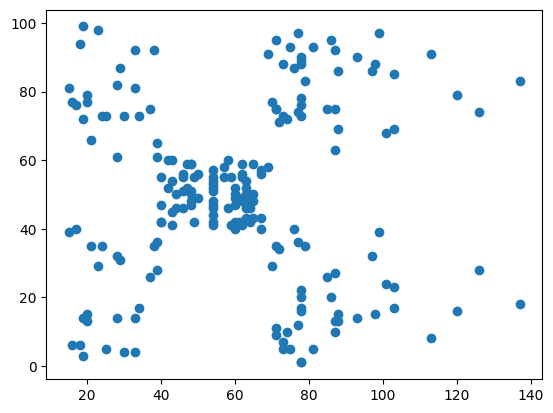

In [23]:
plot_cluster(x,y)

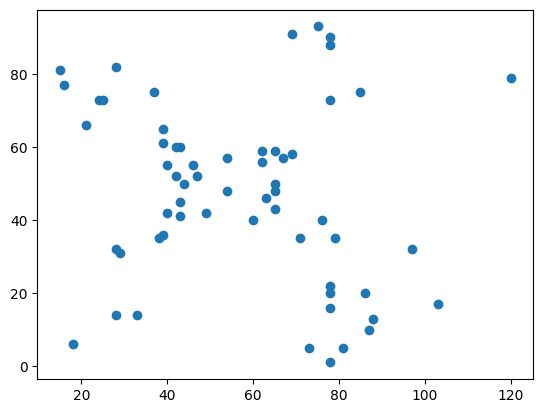

In [24]:
plot_cluster(x_test,y_pred)

In [25]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundary(clusterer, X, resolution=1000, show_centroids=True,
                      show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    z= clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    plt.contourf(z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    plot_data(X)
    if show_centroids:
      plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
      plt.xlabel("$x_1$", fontsize=14)
    else:
      plt.tick_params(labelbottom=False)
    if show_ylabels:
      plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
      plt.tick_params(labelleft=False)

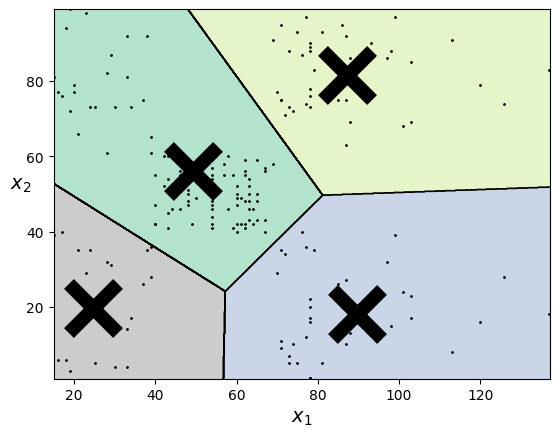

In [26]:
# for four clusters
plot_decision_boundary(model,x)
plt.show()

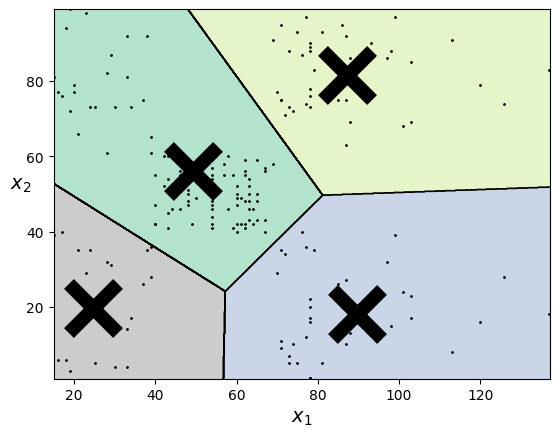

In [27]:
# for 5 clusters
plot_decision_boundary(model,x)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21862.092672182895, 19672.072849014323]


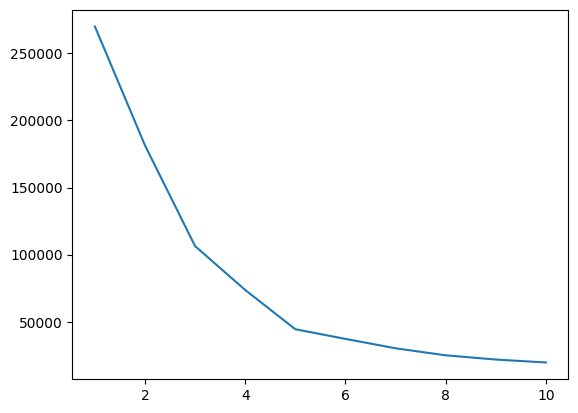

In [28]:
# using for loop for clustering
# within cluster sum of squares wcss
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(x)
    # model.inertia_ is used detrmine point lies within the cluster or not...
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
print(wcss)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


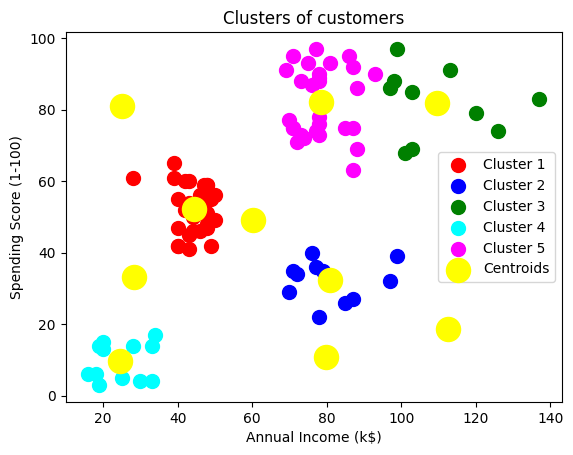

In [29]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

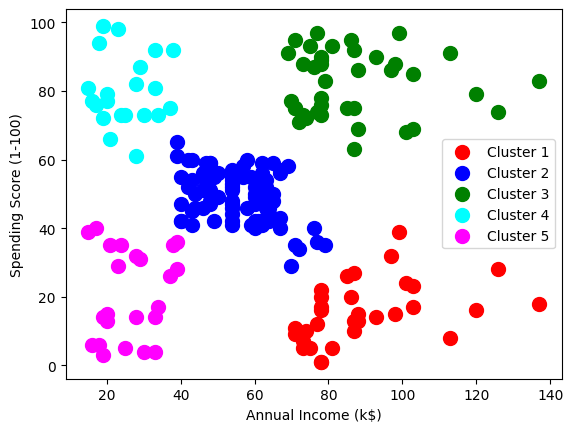

In [30]:
plt.scatter(x[model1_hc == 0, 0], x[model1_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[model1_hc == 1, 0], x[model1_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[model1_hc == 2, 0], x[model1_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[model1_hc == 3, 0], x[model1_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[model1_hc == 4, 0], x[model1_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

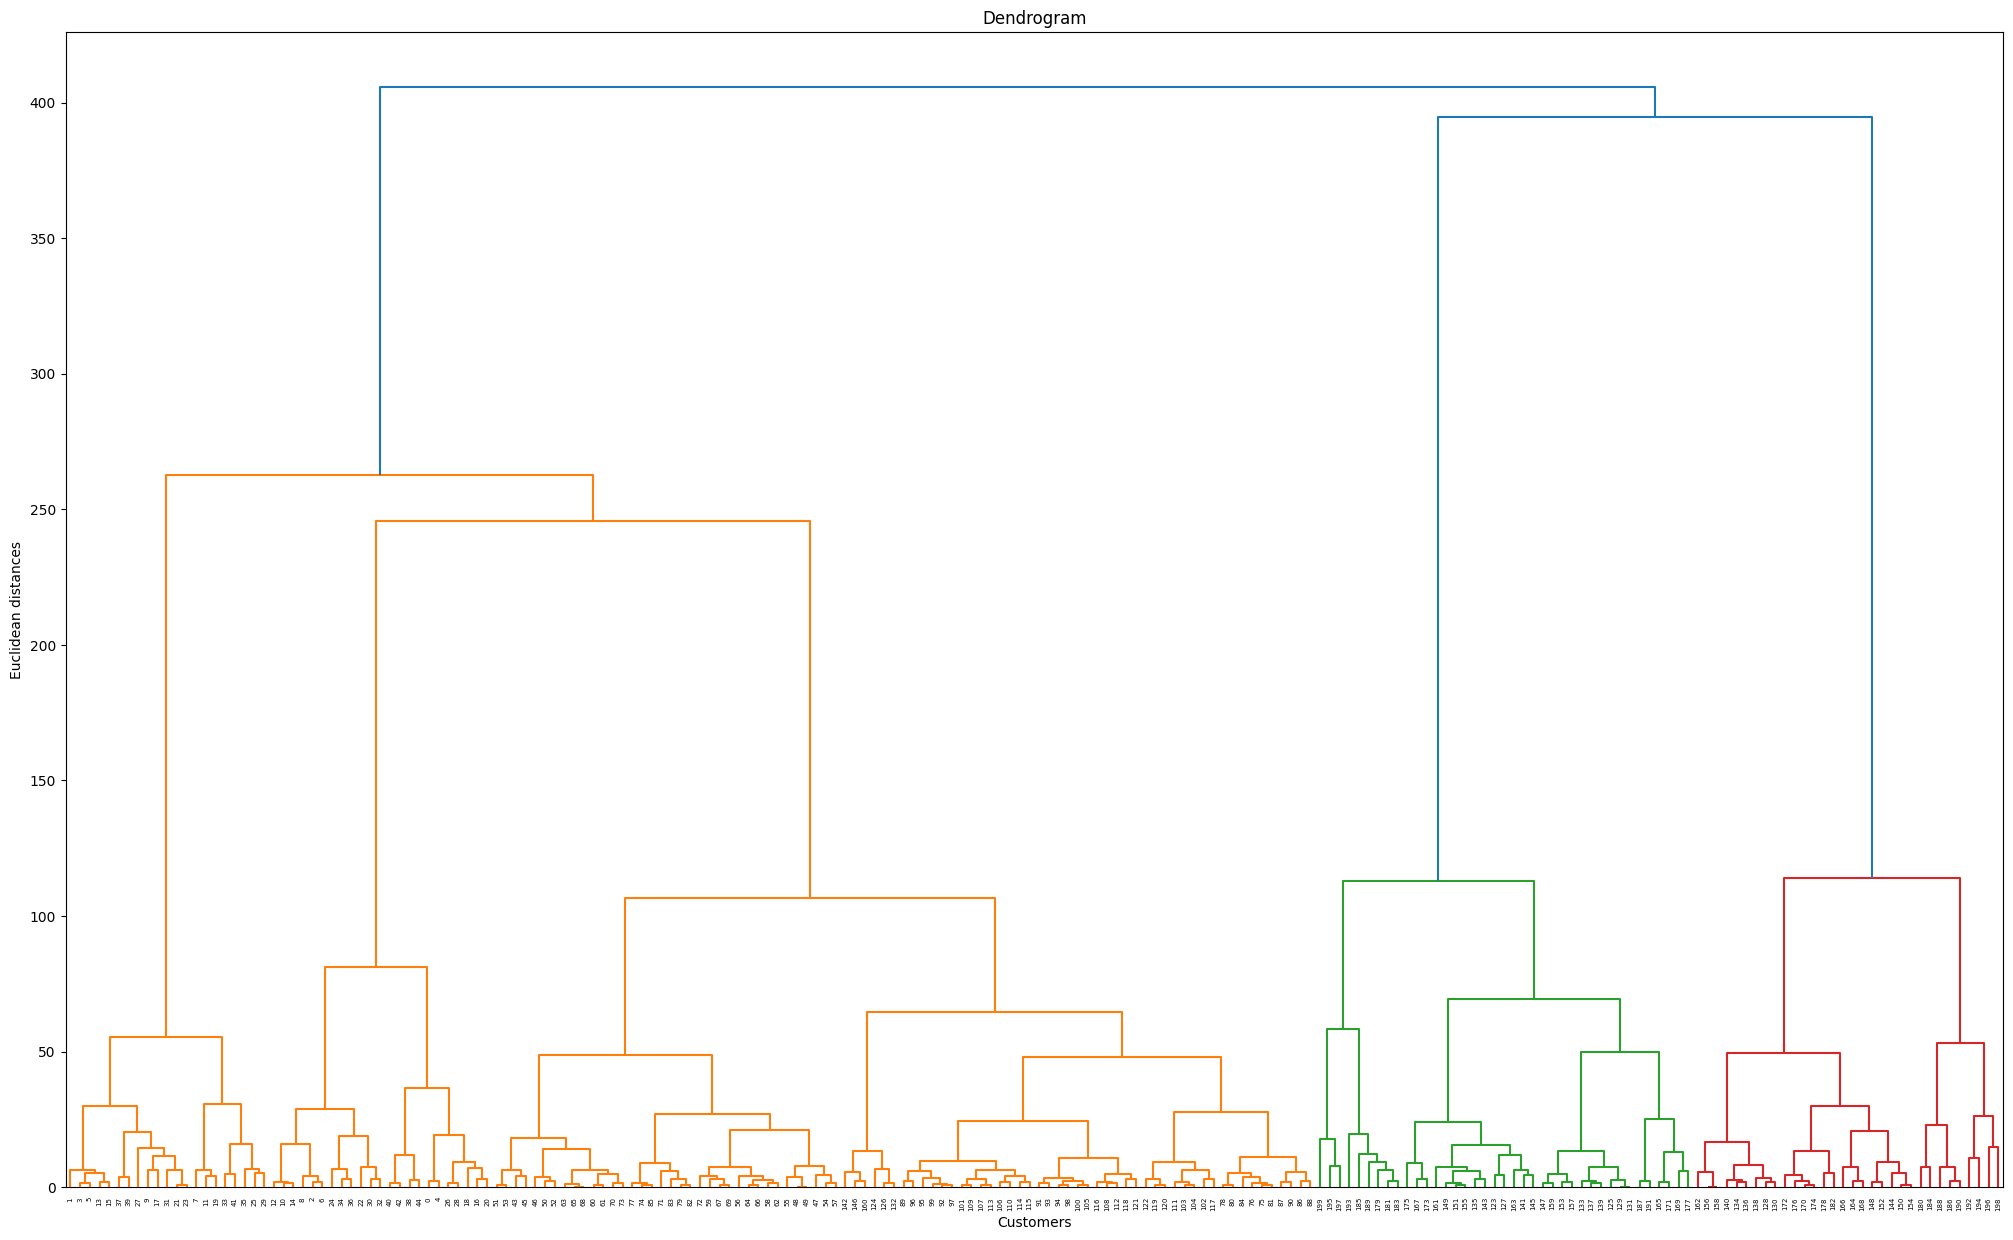

In [31]:
plt.figure(figsize=(25,15))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [32]:
# Algorithm for KMenas
# User define function
# def Kmeans(K,D):
# choose k data points as initail centroids ( cluster Centers)
# for x in D:
    # compute each distance form centroid
    # assign x to closest centroid
    # end for
# re-compute the centroids using the current cluster membership unitll stopping culster point is meet

## Stopping Criteria
* no re-assignmnet of data points to different clusters
* no change of centroids
* minimum decrease in the sum of squared errors (SSE)  

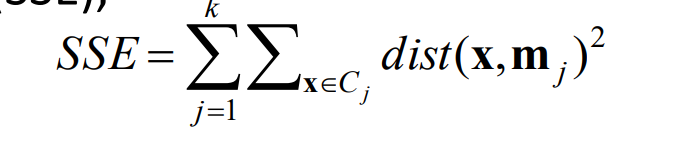

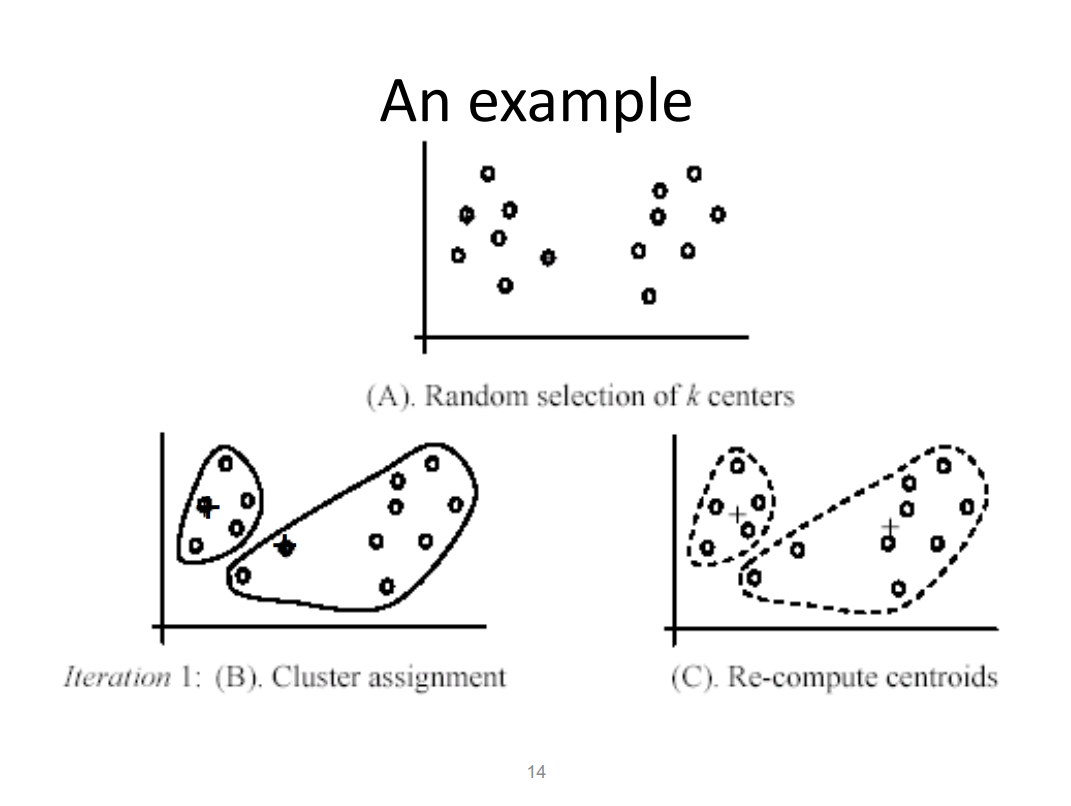

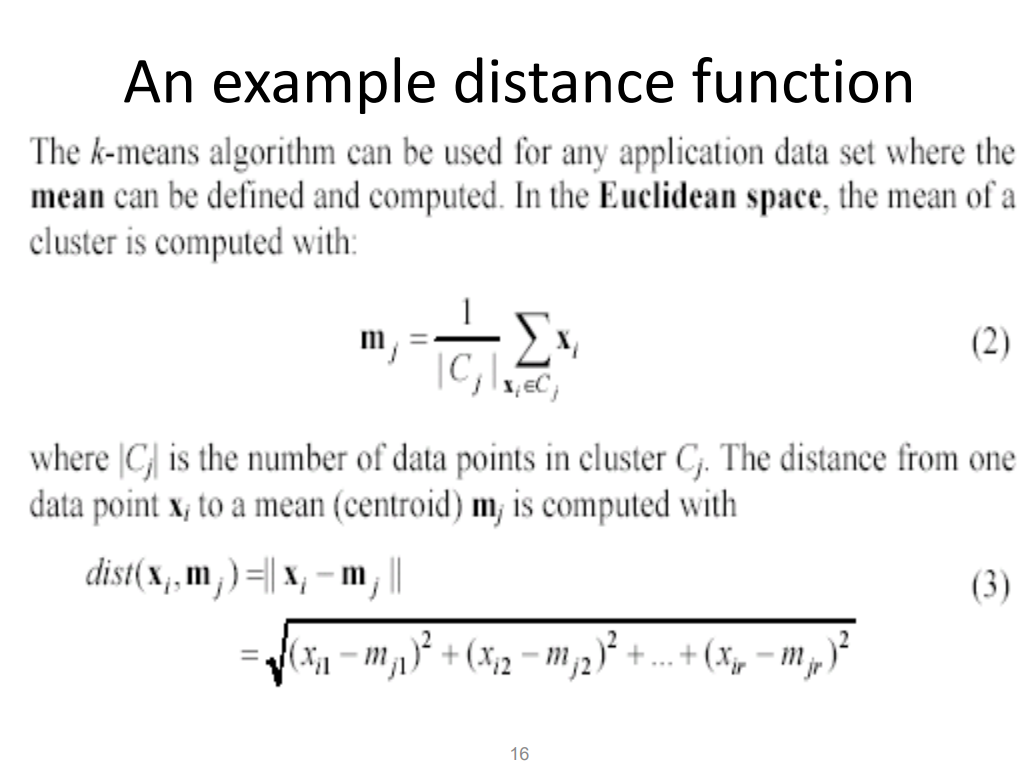

# Strengths of k-means
# Strengths:
            # easy to understand and implement
            # time complexity O(tkn) n = no of data points, k = no of clusters, t = no of iteration
            # since k and t both are small so this can be consider as linear algorithms

# Weakness:
            # user need to specify k
            # senstitive to OUTLIRES

# Despite weaknesses, k-means is still the most
# popular algorithm due to its simplicity,
# efficiency and
# – other clustering algorithms have their own lists of
# weaknesses.
# • No clear evidence that any other clustering
# algorithm performs better in general
# – although they may be more suitable for some
# specific types of data or applications.
# • Comparing different clustering algorithms is a
# difficult task. No one knows the correct
# clusters!

# Single Link Method
* the distance between tow clusters is datapoint between two closest data points in the two clusters one data point from each cluster
* the distance betn two clusters in the distance of two furthest datapoint in two clusters

* Squared Euclidean distance: to place
progressively greater weight on data points
that are further apart

* Chebychev distance: one wants to define two
data points as "different" if they are different
on any one of the attributes.


* Binary attribuits has two values or states but no ordering realtioship ex] male and female

* we use a confustion matrix to introduce the distance function measure
le eh ith and jth data points be xi and xj vectors

# Confusion matrix
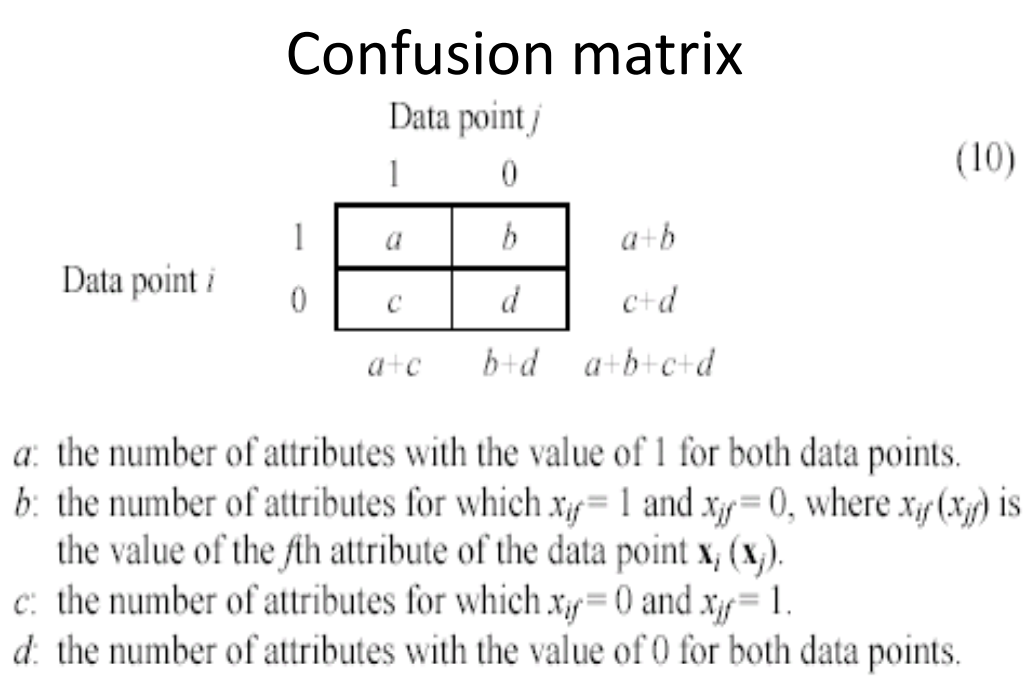

#  Symmetric Binary Attribuits
#  ASymmetric Binary Attribuits
#  Normal Attribuits

In [33]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Holes in data space
A hole is a region in the data space that contains
no or few data points. Reasons:
* insufficient data in certain areas, and
* certain attribute-value combinations are not possible or
seldom occur.

In [ ]:
# User Define KMeans--->
def KMeans(dataSet,k):
    # initalize Centroids Randomly
    numFeatures = dataSet.getNumFeatures()
    centroids = getRandomCentroids(numFeatures, k)

    # initialize book keeping var
    iteration = 0
    oldcentroids = None

    # Main Program
    # should Stop Function
    # 2 things 1st no of iteration 2nd oldcentroids and new centroids are smae or not
    while not shouldStop(oldcentroids, centroids, iteration):
        oldcentroids = centroids
        iterations += 1

        # Makes cetroid as label and returns that lable
        labels = getLabel(dataSet, centroids)

        centroids = getCetroids(dataSet, labels, k)

    return centroids

def shouldStop(oldcentroids, centroids, iteration):
